In [52]:
import os, struct
import math, random, copy
import numpy as np
import sys
from scipy import misc
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd
import mnist
import scipy.misc

/Users/poonl/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/Users/poonl/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


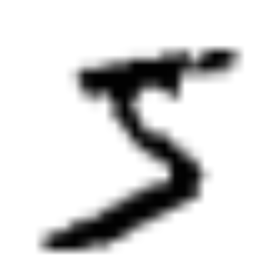

In [53]:
images = mnist.train_images()
scipy.misc.toimage(scipy.misc.imresize(images[0,:,:] * -1 + 256, 10.))


In [54]:
im_of_20 = np.zeros((20, 28, 28))

In [55]:
im_of_20_flip = np.zeros((20, 28, 28))

In [56]:
for i in range(20): #get the first 20 images to work with
    im_of_20[i,:,:] = images[i,:,:]

### Step 2 - Adding noises to images

In [57]:
noise_df = np.loadtxt("NoiseCoordinates.csv", delimiter= ',',  usecols=range(1,16), skiprows=1)

In [58]:
im_of_20_map = np.where(im_of_20 < 0.5 ,-1,1)

In [59]:
im_of_20_map[0,21,:]

array([-1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [60]:
noise_df.shape

(40, 15)

In [65]:
im_of_20_flip = im_of_20_map

In [66]:
noise_df[1*2,1]

9.0

In [73]:
for i in range(20):
    for j in range(15):
        row = int(noise_df[i*2,j])
        col = int(noise_df[i*2+1,j])
        if im_of_20_flip[i, row, col] == 1:
            im_of_20_flip[i, row, col] = -1
        else:
            im_of_20_flip[i, row, col] = 1

### Step 3 - Denoising with Mean Field Inference

In [76]:
import copy

In [77]:
initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',') # 28x28
update_df = np.loadtxt("UpdateOrderCoordinates.csv", delimiter= ',', usecols=range(1,785), skiprows=1)

In [78]:
update_df.shape

(40, 784)

In [79]:
for i in range(10):
    for img in range(20):
        for idx in range(784): 
            row_num = int(update_df[img*2,idx])
            col_num = int(update_df[img*2+1,idx])
            first_sum = 0 
            sec_sum = 0 
            third_sum = 0
            fourth_sum = 0
            if (row_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num - 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num - 1, col_num])
            if (row_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num + 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num + 1, col_num])
            if (col_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num - 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num - 1])
            if (col_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num + 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num + 1])
            numerator = np.exp(first_sum+sec_sum)
            denominator = numerator + np.exp(third_sum+fourth_sum)

            initial_df[row_num , col_num] = numerator/denominator

In [80]:
initial_df

array([[1.36740135e-05, 5.05675318e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05675318e-08, 1.36740135e-05],
       [5.05675318e-08, 1.86983699e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86985327e-10, 1.86983671e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983699e-10, 5.05675

### Step 4 - Turning in the energy function values computed initially and after each iteration

In [190]:
im = copy.deepcopy(im_of_20_map[0,:,:])
out_im = copy.deepcopy(im_of_20_map[0,:,:])
im[:,:] = np.where(im[:,:] < 0.5 ,0,1)

In [191]:
theta_1 = 0.8
theta_2 = 2
im_temp =  copy.deepcopy(initial_df)
im_temp_pr =  copy.deepcopy(initial_df)

In [192]:
for k in range(5):
    for i in range(28):
        for j in range(28):
            EQ_P = 0.0
            EQ_Q = 0
            if (i >= 1): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i-1,j]-1) + theta_2 * im[i-1,j]
            if (i < 27): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i+1,j]-1) + theta_2 * im[i+1,j]
            if (j >= 1): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i,j-1]-1) + theta_2 * im[i,j-1]
            if (j <27):
                    EQ_P += theta_1 * (2 * im_temp_pr[i,j+1]-1) + theta_2 * im[i,j+1]
            im_temp[i,j] = np.exp(EQ_P) / (np.exp(EQ_P)+np.exp(-EQ_P))
    im_temp_pr  =  copy.deepcopy(im_temp)

        
#here is to loop over x y and get the pi[i] as in book page 263

In [186]:
im_temp

array([[ 0.12740902,  0.99063091,  0.99858948,  0.99182831,  0.99976283,
         0.99155932,  0.46782802,  0.99132822,  0.30278311,  0.99132805,
         0.98327455,  0.99132804,  0.99115738,  0.99132592,  0.96408582,
         0.99073241,  0.91147881,  0.82476324,  0.98438455,  0.01156283,
         0.9911696 ,  0.00867552,  0.89432032,  0.00867214,  0.01724408,
         0.0086989 ,  0.01588492,  0.04168815],
       [ 0.9903739 ,  0.12468828,  0.99832164,  0.99996081,  0.99832191,
         0.99004707,  0.99826629,  0.48314053,  0.99826624,  0.9799555 ,
         0.99826624,  0.99825626,  0.99826624,  0.99819381,  0.99826561,
         0.98901391,  0.9976319 ,  0.99531537,  0.39392031,  0.99825525,
         0.00238908,  0.99806205,  0.00175688,  0.56400352,  0.00173688,
         0.02137973,  0.00180422,  0.21750624],
       [ 0.02314021,  0.99826583,  0.95382564,  0.99831386,  0.99828668,
         0.99830467,  0.99235503,  0.99830466,  0.98815466,  0.99830466,
         0.9982915 ,  0.9983

In [85]:
np.sum(im_temp)

625.76477275558659

In [28]:
im_temp_out = np.zeros((28,28))

In [193]:
im_temp_out[:,:] = np.where(im_temp[:,:] < 0.5 ,0,1)

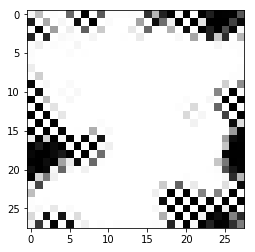

In [194]:
plt.imshow(im_temp.astype(np.float64),cmap='gray')
plt.show() #????????????????????????????????????